In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn import svm
import joblib
%matplotlib inline

In [2]:
crystal = pd.read_csv('SuiB Final Set.csv', sep=',')

In [3]:
crystal.head()

,Buffer Con,pKa,pH (main),Salt Conc,ion charge,Salt 2 conc,ion charge 2,Precipitating Agent Conc,Precipitating agent size,Organic Concentration,Organic Size,Polyol Concentration,Polyol Size,Crystal
0,0.1,3.10,3.5,2.0,2,0.0,0,0.0,0,0,0,0,0,0
1,0.1,4.54,4.5,2.0,2,0.0,0,0.0,0,0,0,0,0,0
2,0.1,6.46,5.5,2.0,2,0.0,0,0.0,0,0,0,0,0,0
3,0.1,6.46,6.5,2.0,2,0.0,0,0.0,0,0,0,0,0,1
4,0.1,7.50,7.5,2.0,2,0.0,0,0.0,0,0,0,0,0,0


In [4]:
crystal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Buffer Con                267 non-null    float64
 1   pKa                       267 non-null    float64
 2   pH (main)                 267 non-null    float64
 3   Salt Conc                 267 non-null    float64
 4   ion charge                267 non-null    int64  
 5   Salt 2 conc               267 non-null    float64
 6   ion charge 2              267 non-null    int64  
 7   Precipitating Agent Conc  267 non-null    float64
 8   Precipitating agent size  267 non-null    int64  
 9   Organic Concentration     267 non-null    int64  
 10  Organic Size              267 non-null    int64  
 11  Polyol Concentration      267 non-null    int64  
 12  Polyol Size               267 non-null    int64  
 13  Crystal                   267 non-null    int64  
dtypes: float64

In [5]:
crystal.isnull().sum()

Buffer Con                  0
pKa                         0
pH (main)                   0
Salt Conc                   0
ion charge                  0
Salt 2 conc                 0
ion charge 2                0
Precipitating Agent Conc    0
Precipitating agent size    0
Organic Concentration       0
Organic Size                0
Polyol Concentration        0
Polyol Size                 0
Crystal                     0
dtype: int64

In [6]:
#examining column labeled "Crytal"
crystal['Crystal'].value_counts()

0    215
1     52
Name: Crystal, dtype: int64

/Users/jmbowma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crystal', ylabel='count'>

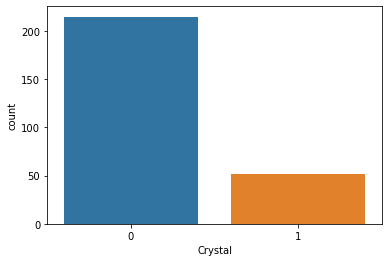

In [7]:
sns.countplot(crystal['Crystal'])

In [10]:
#create x array by dropping the last column, not sure yet whay "axis = 1" means, y is last
#column, i.e., the output data.
X = crystal.drop('Crystal', axis = 1)
y = crystal['Crystal']
#print X and print y and indeed these are corret
#X

,Buffer Con,pKa,pH (main),Salt Conc,ion charge,Salt 2 conc,ion charge 2,Precipitating Agent Conc,Precipitating agent size,Organic Concentration,Organic Size,Polyol Concentration,Polyol Size
0,0.1,3.10,3.5,2.0,2,0.0,0,0.0,0,0,0,0,0
1,0.1,4.54,4.5,2.0,2,0.0,0,0.0,0,0,0,0,0
2,0.1,6.46,5.5,2.0,2,0.0,0,0.0,0,0,0,0,0
3,0.1,6.46,6.5,2.0,2,0.0,0,0.0,0,0,0,0,0
4,0.1,7.50,7.5,2.0,2,0.0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.1,7.50,7.5,0.0,0,0.0,0,10.0,10000,5,3,0,0
263,0.1,8.10,8.0,0.2,1,0.0,0,16.0,10000,0,0,0,0
264,0.1,3.10,3.5,0.0,0,0.0,0,6.0,20000,5,3,0,0
265,0.1,4.54,4.5,1.0,2,0.0,0,2.0,20000,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
def classification_report_weight(report):
    report_data = []
    lines = report.split('\n')
    vals = lines[7].split('      ')
    weight = float(vals[1])
    return weight

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
X_train[:10]

array([[-0.06098264, -0.09504742, -0.09935936, -0.336752  ,  1.04652564,
        -0.1823636 , -0.19791075,  0.86514864,  0.12076386, -0.25613588,
        -0.2987134 , -0.21373513, -0.08917075],
       [-0.06098264,  0.15921004,  0.25173379, -0.57381782, -1.11125919,
        -0.1823636 , -0.19791075,  0.44820954,  0.76247435, -0.25613588,
        -0.2987134 , -0.21373513, -0.08917075],
       [-0.06098264, -0.32687041, -0.09935936, -0.336752  ,  1.04652564,
        -0.1823636 , -0.19791075,  1.28208775,  0.52031945, -0.25613588,
        -0.2987134 , -0.21373513, -0.08917075],
       [-0.06098264,  0.6826813 ,  0.60282693, -0.336752  ,  1.04652564,
        -0.1823636 , -0.19791075, -0.38566867,  0.12076386, -0.25613588,
        -0.2987134 , -0.21373513, -0.08917075],
       [-0.06098264, -1.53085429, -1.85482509, -0.57381782, -1.11125919,
        -0.1823636 , -0.19791075,  0.03127043, -0.5935931 , -0.25613588,
        -0.2987134 , -0.21373513, -0.08917075],
       [-0.06098264, -1.530854

In [13]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.50      0.14      0.22        14

    accuracy                           0.79        67
   macro avg       0.65      0.55      0.55        67
weighted avg       0.74      0.79      0.74        67



In [14]:
x = 0
weight = 0
store = 0
rfc = RandomForestClassifier(n_estimators = 200)
while x < 100:
    rfc.fit(X_train, y_train)
    pred_rfc = rfc.predict(X_test)
    report = classification_report(y_test, pred_rfc)
    store = classification_report_weight(report)
    if store > weight:
        weight = store
        joblib.dump(rfc, "./random_forest.joblib")
        
    x = x + 1

In [18]:
reloaded_rfc = joblib.load("./random_forest.joblib")
reloaded_rfc.fit(X_train, y_train)
pred_rfc2 = reloaded_rfc.predict(X_test)
print(classification_report(y_test, pred_rfc2))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.50      0.14      0.22        14

    accuracy                           0.79        67
   macro avg       0.65      0.55      0.55        67
weighted avg       0.74      0.79      0.74        67



In [35]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       0.00      0.00      0.00        14

    accuracy                           0.79        67
   macro avg       0.40      0.50      0.44        67
weighted avg       0.63      0.79      0.70        67



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
x = 0
weight = 0
store = 0
while x < 100:
    clf.fit(X_train, y_train)
    pred_clf = clf.predict(X_test)
    report = classification_report(y_test, pred_clf)
    store = classification_report_weight(report)
    if store > weight:
        weight = store
        joblib.dump(clf, "./SVC.joblib")
        
    x = x + 1

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

In [37]:
reloaded_svc = joblib.load("./SVC.joblib")
reloaded_svc.fit(X_train, y_train)
pred_rfc3 = reloaded_svc.predict(X_test)
print(classification_report(y_test, pred_rfc3))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       0.00      0.00      0.00        14

    accuracy                           0.79        67
   macro avg       0.40      0.50      0.44        67
weighted avg       0.63      0.79      0.70        67



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
mlpc = MLPClassifier(hidden_layer_sizes = (7,), max_iter = 1500)

In [38]:
x = 0
weight = 0
store = 0

while x < 100:
    mlpc.fit(X_train, y_train)
    pred_nn = mlpc.predict(X_test)
    report = classification_report(y_test, pred_nn)
    store = classification_report_weight(report)
    if store > weight:
        weight = store
        joblib.dump(rfc, "./neuralnetwork.joblib")
        
    x = x + 1




/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

In [39]:
reloaded_nn = joblib.load("./neuralnetwork.joblib")
reloaded_nn.fit(X_train, y_train)
pred_rfc4 = reloaded_nn.predict(X_test)
print(classification_report(y_test, pred_rfc4))


              precision    recall  f1-score   support

           0       0.83      0.98      0.90        53
           1       0.75      0.21      0.33        14

    accuracy                           0.82        67
   macro avg       0.79      0.60      0.61        67
weighted avg       0.81      0.82      0.78        67



In [42]:
q = QuantileTransformer(output_distribution='normal')
X_train = q.fit_transform(X_train)
X_test = q.fit_transform(X_test)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (67). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [26]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        53
           1       0.83      0.36      0.50        14

    accuracy                           0.85        67
   macro avg       0.84      0.67      0.71        67
weighted avg       0.85      0.85      0.83        67



In [28]:
x = 0
weight = 0
store = 0
rfc = RandomForestClassifier(n_estimators = 200)
while x < 100:
    rfc.fit(X_train, y_train)
    pred_rfc = rfc.predict(X_test)
    report = classification_report(y_test, pred_rfc)
    store = classification_report_weight(report)
    if store > weight:
        weight = store
        joblib.dump(rfc, "./random_forestQ.joblib")
    x = x + 1

In [29]:
reloaded_rfc = joblib.load("./random_forestQ.joblib")
reloaded_rfc.fit(X_train, y_train)
pred_rfc3 = reloaded_rfc.predict(X_test)
print(classification_report(y_test, pred_rfc3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        53
           1       1.00      0.29      0.44        14

    accuracy                           0.85        67
   macro avg       0.92      0.64      0.68        67
weighted avg       0.87      0.85      0.82        67



In [43]:
clf = svm.SVC()

In [44]:
x = 0
weight = 0
store = 0
while x < 100:
    clf.fit(X_train, y_train)
    pred_clf = clf.predict(X_test)
    report = classification_report(y_test, pred_clf)
    store = classification_report_weight(report)
    if store > weight:
        weight = store
        joblib.dump(clf, "./SVCQ.joblib")
        
    x = x + 1

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

In [45]:
reloaded_svc = joblib.load("./SVC.joblib")
reloaded_svc.fit(X_train, y_train)
pred_rfc5 = reloaded_svc.predict(X_test)
print(classification_report(y_test, pred_rfc5))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       0.00      0.00      0.00        14

    accuracy                           0.79        67
   macro avg       0.40      0.50      0.44        67
weighted avg       0.63      0.79      0.70        67



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       0.00      0.00      0.00        14

    accuracy                           0.79        67
   macro avg       0.40      0.50      0.44        67
weighted avg       0.63      0.79      0.70        67



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
mlpc = MLPClassifier(hidden_layer_sizes = (7,), max_iter = 1500)
mlpc.fit(X_train, y_train)
pred_nn = mlpc.predict(X_test)

In [47]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.50      0.14      0.22        14

    accuracy                           0.79        67
   macro avg       0.65      0.55      0.55        67
weighted avg       0.74      0.79      0.74        67



In [48]:
x = 0
weight = 0
store = 0

while x < 100:
    mlpc.fit(X_train, y_train)
    pred_nn = mlpc.predict(X_test)
    report = classification_report(y_test, pred_nn)
    store = classification_report_weight(report)
    if store > weight:
        weight = store
        joblib.dump(rfc, "./neuralnetworkQ.joblib")
        
    x = x + 1


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

In [49]:
reloaded_nn = joblib.load("./neuralnetworkQ.joblib")
reloaded_nn.fit(X_train, y_train)
pred_rfc6 = reloaded_nn.predict(X_test)
print(classification_report(y_test, pred_rfc6))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        53
           1       1.00      0.29      0.44        14

    accuracy                           0.85        67
   macro avg       0.92      0.64      0.68        67
weighted avg       0.87      0.85      0.82        67

